## 1. Unsupervised learninig
비지도 학습
- 레이블 없이 학습
- 데이터의 숨겨진 구조/특징을 발견할 수 있다. 

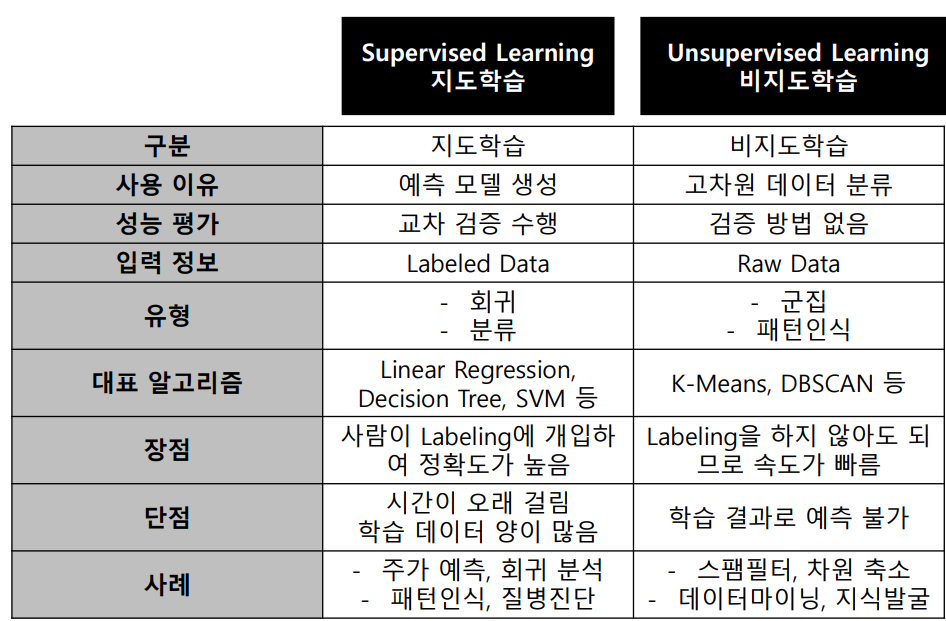

### 1.1 지도학습의 한계
- 레이블을 달아줘야 하는 지도학습은 정답이 주어진 데이터만을 사용할 수 있기 때문에 데이터 양에 한계가 있다.
- 대부분의 인공지능 전문가들은 미래의 인공지능 기술은 비지도 학습이 선도할 것이라고 전망한다.

### 1.2 최신 비지도 학습 연구분야
#### Auto Encoder
- 입력 데이터의 특징점을 효율적으로 찾고자 함.
- 다차원 입력 데이터를 저차원으로 변환하고, 다시 다차원으로 바꿔 특징점을 찾는다.
- 특징점들은 데이터 압축, 데이터 관계 관찰, 노이즈 억제 등에 활용된다.

#### GAN
- 생성모델
- Generator와 Disciriminator

## 2. Clustering

### 2.1 클러스터링의 목적
비슷한 개체끼리는 한 그룹으로, 다른 개체는 다른 그룹으로 묶는 것이 클러스터링의 목적
- 군집 간 분산은 최대화, 군집 내 분산은 최소화

### 2.2 Clustering과 Classification의 차이
- 클러스터링은 정답이 없는 비지도학습
- 분류는 정답이 있는 지도학습

### 2.3 군집 타당성 평가
- 클러스터링은 정답이 없기 때문에 정확도 같은 지표가 없다.
- 아래의 것들로 군집을 만든 결과가 얼마나 유용한지 평가
1. 군집 간 거리
2. 군집의 지름
3. 군집의 분산

## 3. K-means Clustering
- 각 군집은 하나의 중심을 가진다.
- 각 개체는 가장 가까운 중심에 할당되며 같은 중심에 할당된 개체들이 모여 하나의 군집을 형성한다.
- 따라서 사용자가 사전에 군집 수(k)를 정해야 한다.

K-means Clustering 알고리즘은 EM 알고리즘을 기반으로 하는데, Expectation step과 Maximization step을 반복한다.

### 3.2 K-Means Clustering의 단점
- 군집 중심의 초기값을 랜덤하게 정하는 알고리즘이므로, 초기값 위치에 따라 원하는 결과가 나오지 않을 수 있다.
- 군집의 크기가 다를 경우 제대로 작동하지 않을 수 있다.
- 군집의 밀도가 다를 경우 제대로 작동하지 않을 수 있다.
- 데이터 분포가 특이한 경우 군집이 잘 이루어지지 않는다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

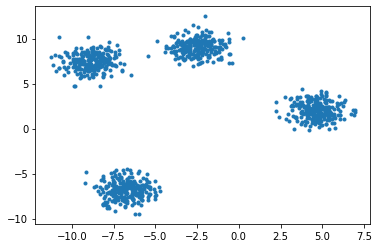

In [2]:
np.random.seed(42) # 랜덤값 고정

X,y = make_blobs(n_samples = 1000, centers = 4, cluster_std = 0.9)

plt.scatter(X[:,0], X[:,1], marker = '.')
plt.show()

In [3]:
model = KMeans(init = "k-means++", n_clusters = 4, n_init=12)
model.fit(X)

KMeans(n_clusters=4, n_init=12)

In [4]:
k_means_labels = model.labels_
print('k_means_labels:', k_means_labels)

k_means_cluster_centers = model.cluster_centers_
print('k_means_cluster_centers :', k_means_cluster_centers)

k_means_labels: [3 0 0 2 2 0 2 0 0 2 2 3 1 0 0 0 1 1 1 2 2 3 3 3 2 2 1 1 0 2 0 0 0 1 1 3 0
 2 3 3 2 0 2 3 2 3 1 2 3 2 0 1 2 3 1 3 1 1 1 0 0 1 0 3 2 1 0 0 2 1 3 1 2 0
 2 3 2 1 2 1 0 1 1 1 2 3 0 0 1 1 1 1 2 2 3 2 3 1 2 0 2 3 3 1 3 2 2 1 0 1 3
 0 2 2 2 2 0 3 0 2 1 0 3 2 3 0 2 3 0 2 1 0 2 3 2 3 1 0 2 2 1 1 3 3 3 2 2 1
 1 1 1 3 0 0 1 2 1 2 2 3 0 1 2 0 1 1 2 0 3 0 2 1 1 2 1 3 0 3 0 3 2 2 1 0 1
 0 2 3 1 0 2 1 2 2 1 3 0 0 0 3 1 0 2 1 2 2 0 1 2 0 0 3 0 0 2 1 0 1 3 2 3 3
 0 1 3 1 2 0 0 1 1 0 1 3 0 0 3 0 0 2 0 3 0 2 3 1 2 1 2 2 2 2 3 2 2 0 1 0 0
 2 2 2 3 2 3 3 0 2 1 3 2 1 2 0 1 3 2 3 0 2 3 0 3 2 0 1 1 0 1 3 3 1 0 0 0 1
 0 0 0 1 0 3 0 3 1 0 3 2 3 3 0 3 3 2 0 3 2 1 3 3 0 0 0 2 3 0 1 0 1 1 0 0 3
 3 0 1 3 2 3 2 3 0 0 2 1 2 3 3 1 1 1 1 1 2 1 1 0 2 1 3 2 0 0 2 3 2 3 3 3 0
 2 2 2 2 1 2 1 0 2 1 0 2 3 2 2 3 1 3 0 3 0 1 3 1 3 3 0 2 2 2 1 3 1 2 2 3 2
 1 1 3 2 1 3 0 3 0 0 1 3 2 1 2 1 1 1 3 0 3 2 0 1 1 3 1 3 0 3 0 0 1 3 3 3 2
 1 1 2 2 0 3 3 3 2 1 3 1 0 0 2 1 2 2 1 1 2 2 0 0 2 1 3 2 2 3 3 0 3 1 2 1 3
 2 3 0 2 

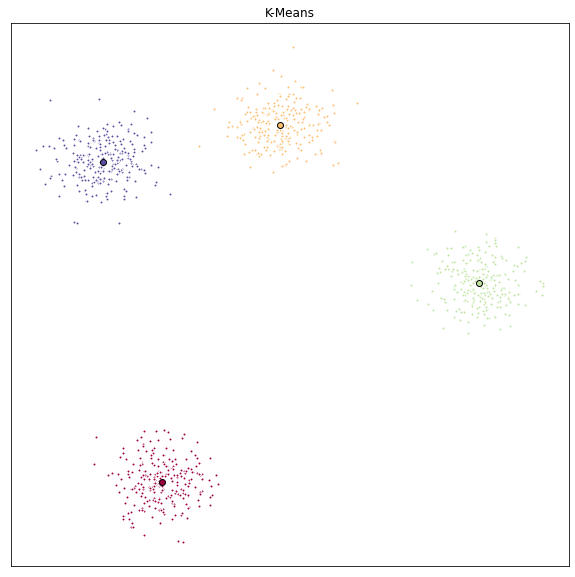

In [7]:
fig = plt.figure(figsize = (10,10))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))

#plot 생성
ax = fig.add_subplot(1,1,1)

for k, col in zip(range(4), colors):
    my_members = (k_means_labels == k)
    
    # 중심 정의
    cluster_center = k_means_cluster_centers[k]
    
    # 중심 그리기
    ax.plot(X[my_members, 0], X[my_members,1], 'w',markerfacecolor = col, marker = '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6)

ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()